In [2]:
import cv2 as cv
import dlib
import matplotlib.pyplot as plt

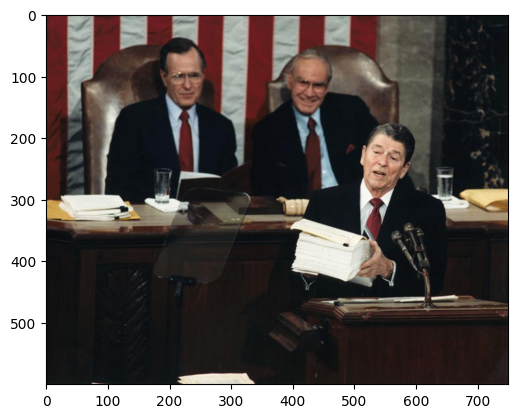

In [3]:
img = cv.imread("data/fotos/grupo.0.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

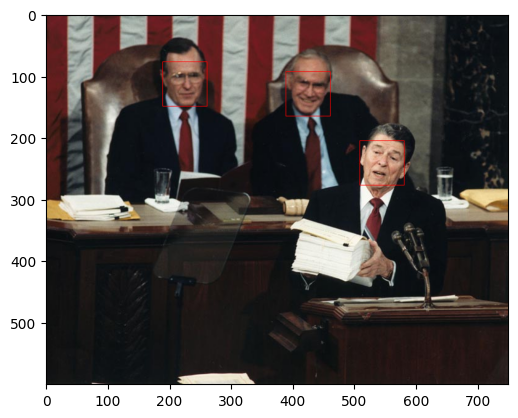

In [19]:
detector = dlib.get_frontal_face_detector()
detected_faces = detector(img, 0) #img to detect, image scale

img_with_squares = img.copy()

for detected_face in detected_faces:
    x_min, y_max = detected_face.tl_corner().x, detected_face.tl_corner().y
    x_max, y_min = detected_face.br_corner().x, detected_face.br_corner().y

    cv.rectangle(img_with_squares, (x_min, y_max), (x_max, y_min), (0,0,255), 1)

plt.imshow(cv.cvtColor(img_with_squares, cv.COLOR_BGR2RGB))


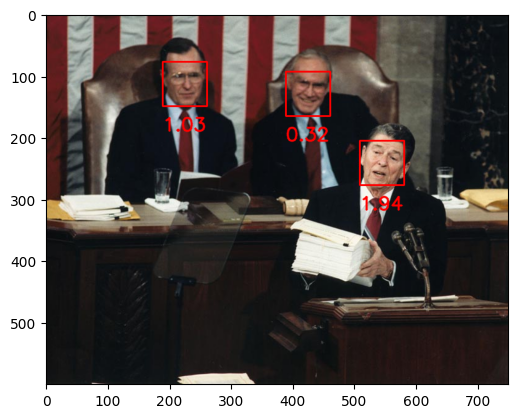

In [34]:
detected_faces, scores, subdetectors = detector.run(img, 0, 0) #img to detect, img scale, score threshold (values above the given one will be considered as faces)

img_with_squares = img.copy()

for detected_face, score, subdetector in zip(detected_faces, scores, subdetectors):
    x_min, y_max = detected_face.tl_corner().x, detected_face.tl_corner().y
    x_max, y_min = detected_face.br_corner().x, detected_face.br_corner().y

    cv.rectangle(img_with_squares, (x_min, y_max), (x_max, y_min), (0,0,255), 2)
    cv.putText(img_with_squares, f"{score:.2f}", (detected_face.bl_corner().x,detected_face.bl_corner().y + 40), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv.LINE_AA)

plt.imshow(cv.cvtColor(img_with_squares, cv.COLOR_BGR2RGB))
